## Learning by Repeating Topical Data Analysis

### 1. Influenza national summary (green and yellow chart)

Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”

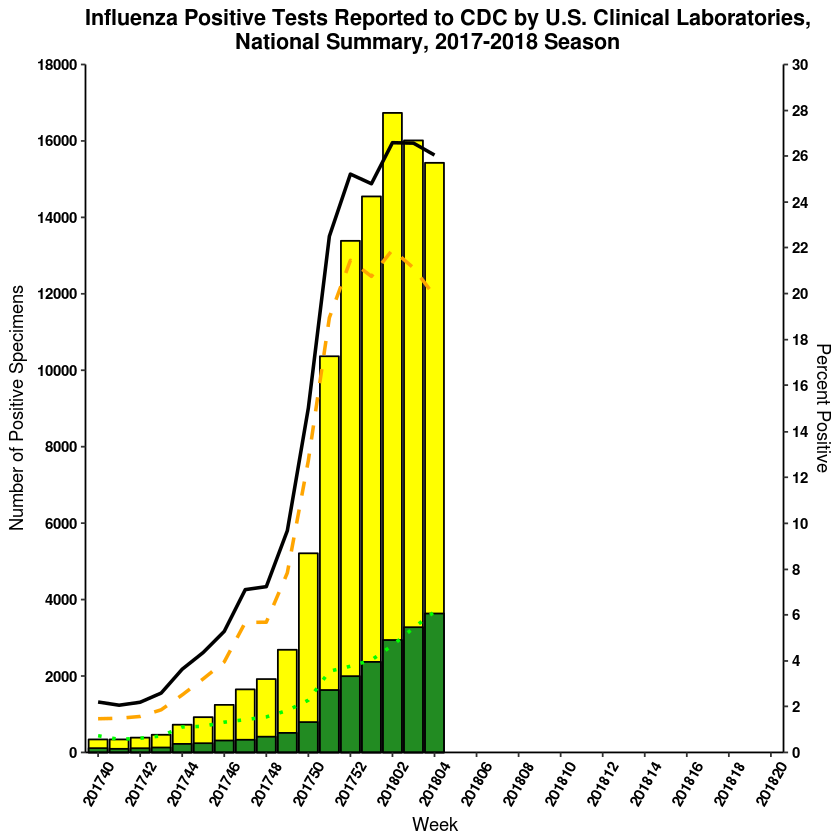

In [3]:
library(ggplot2)
Nationalsummary <- read.csv("../data/National-Summary.csv")
Nationalsummary$Week <- as.numeric(Nationalsummary$Week)
Nationalsummary$Week <- factor(Nationalsummary$Week)
# Nationalsummary$Week <- numeric(as.character(Nationalsummary$Week))
g <- ggplot(Nationalsummary, aes(x=Week))+
geom_bar(aes(y=Total.B+Total.A),stat = "identity", fill = "yellow", color = "black", )+
geom_bar(aes(y=Total.B),stat = "identity", fill = "#228B22", color = "black")+
geom_line(aes(y=X..Positive*18000/30, group =1), colour= "black", size=1)+
geom_line(aes(y=Percent.Positive.A*18000/30, group =1), colour= "orange", linetype = "dashed", size=1)+
geom_line(aes(y=Percent.Positive.B*18000/30, group =1), colour= "green", linetype = "dotted", size=1)+

labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n\t\t\t National Summary, 2017-2018 Season")+
scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens",sec.axis = sec_axis(~ . * 30 / 18000, name = "Percent Positive", breaks=seq(0,30, by=2)), breaks=seq(0,18000, by=2000))+
scale_x_discrete(breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 18000))+
theme_classic()+
theme(axis.text.x = element_text(face="bold", color="black",size=9, angle=60, vjust=0.5),
        axis.text.y = element_text(face="bold", color="black",size=9),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(face="bold", size=13, hjust=0),
     legend.position = "bottom")
g